# Base de données


Attention : refaire cette partie en dosant ce qu'on met ds le rapport ou pas
Et décrire les bases et tout, en définissant ce que c'est qu'un musée tt ça


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

df = pd.read_csv("../output/df_modele_musees.csv")
df.head()

,id_patrimostat,id_museofile,dateappellation,ferme,anneefermeture,ville,codeInseeCommune,annee,payant,gratuit,...,longitude,total_frequentation,age_musee,age_musee_missing,total_t_1,croissance_total,total_t_1_missing,croissance_missing,has_excel,est_idf
0,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2014,1865.0,2685.0,...,7.451102,4550.0,54.0,0,NaN,NaN,1,1,1,0
1,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2015,1874.0,1934.0,...,7.451102,3808.0,55.0,0,4550.0,-0.163077,0,0,1,0
2,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2016,1705.0,1409.0,...,7.451102,3114.0,56.0,0,3808.0,-0.182248,0,0,1,0
3,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2017,1163.0,1281.0,...,7.451102,2444.0,57.0,0,3114.0,-0.215157,0,0,1,0
4,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2018,1249.0,2341.0,...,7.451102,3590.0,58.0,0,2444.0,0.468903,0,0,1,0


In [2]:
#Aperçus du dataframe
df.info()

#attention : une ligne = un musée pr une année

#Stats desc sur le total de frequentation
df["total"].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_patrimostat               11250 non-null  object 
 1   id_museofile                 11230 non-null  object 
 2   dateappellation              11230 non-null  object 
 3   ferme                        11223 non-null  object 
 4   anneefermeture               1015 non-null   object 
 5   ville                        11250 non-null  object 
 6   codeInseeCommune             11250 non-null  object 
 7   annee                        11250 non-null  int64  
 8   payant                       11249 non-null  float64
 9   gratuit                      11249 non-null  float64
 10  total                        11248 non-null  float64
 11  individuel                   9855 non-null   float64
 12  scolaires                    9913 non-null   float64
 13  groupes_hors_sco

count    1.124800e+04
mean     5.018695e+04
std      3.477633e+05
min      0.000000e+00
25%      2.029500e+03
50%      8.481000e+03
75%      2.650125e+04
max      1.010596e+07
Name: total, dtype: float64

# Stats descriptives


## Analyse globale de la fréquentation

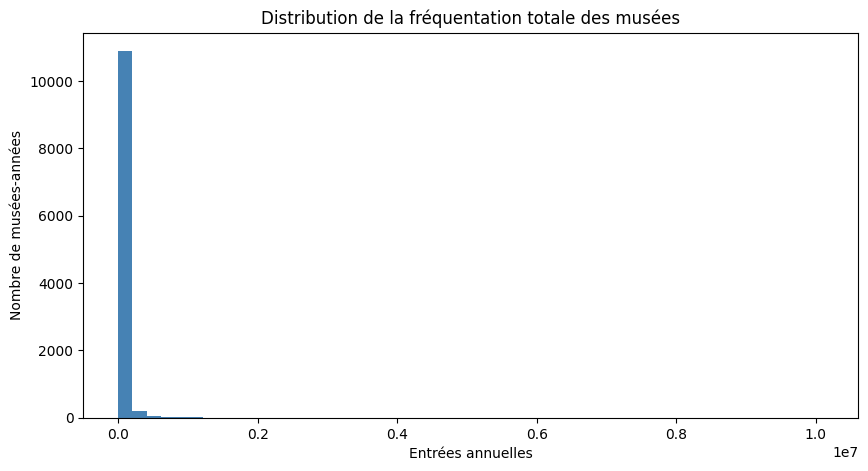

In [3]:
#histogramme pr voir distrib
plt.figure(figsize=(10,5))
plt.hist(df["total"], bins=50, color="steelblue")
plt.title("Distribution de la fréquentation totale des musées")
plt.xlabel("Entrées annuelles")
plt.ylabel("Nombre de musées-années")
plt.show()





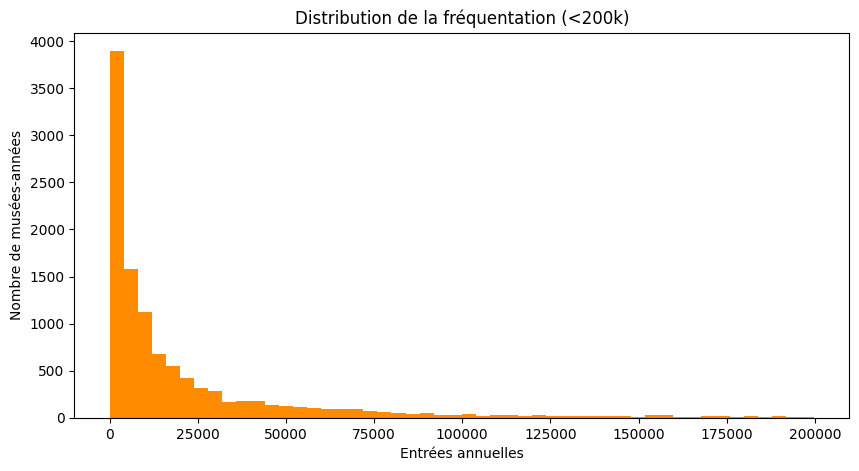

In [4]:
#on remarque les valeurs aberrantes dues aux gros musées
df_sub = df[df["total"] < 200000]

plt.figure(figsize=(10,5))
plt.hist(df_sub["total"], bins=50, color="darkorange")
plt.title("Distribution de la fréquentation (<200k)")
plt.xlabel("Entrées annuelles")
plt.ylabel("Nombre de musées-années")
plt.show()

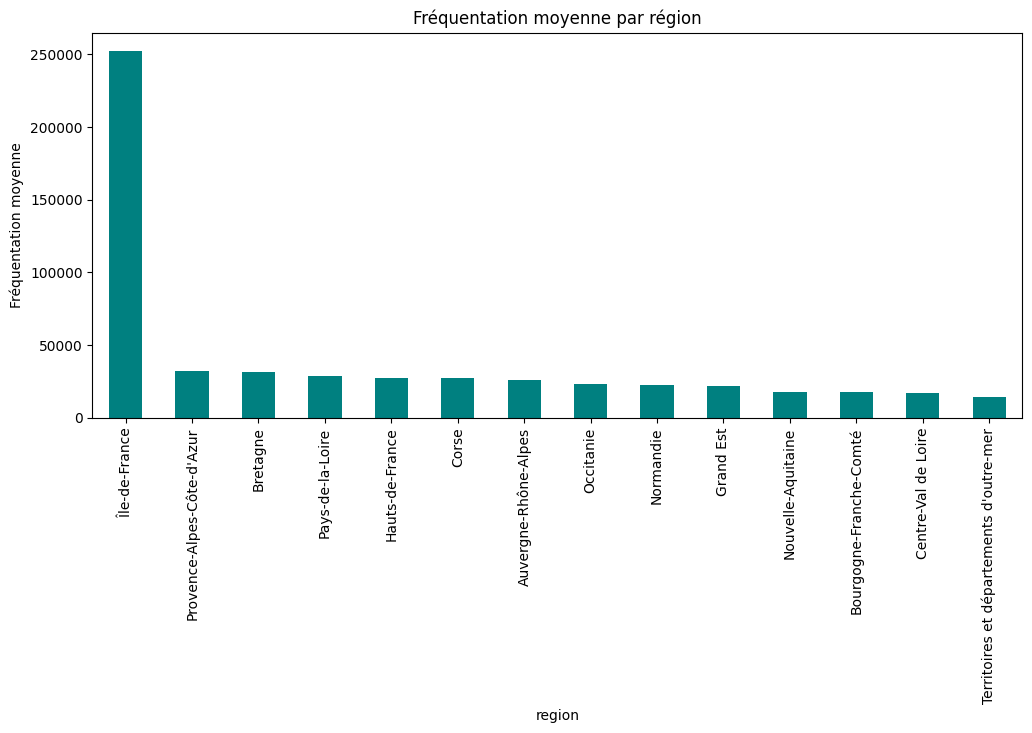

In [5]:
#freq par region
df_reg = (
    df.groupby("region")["total"]
      .mean()
      .sort_values(ascending=False)
)

df_reg.plot(kind="bar", figsize=(12,5), color="teal")
plt.title("Fréquentation moyenne par région")
plt.ylabel("Fréquentation moyenne")
plt.show()


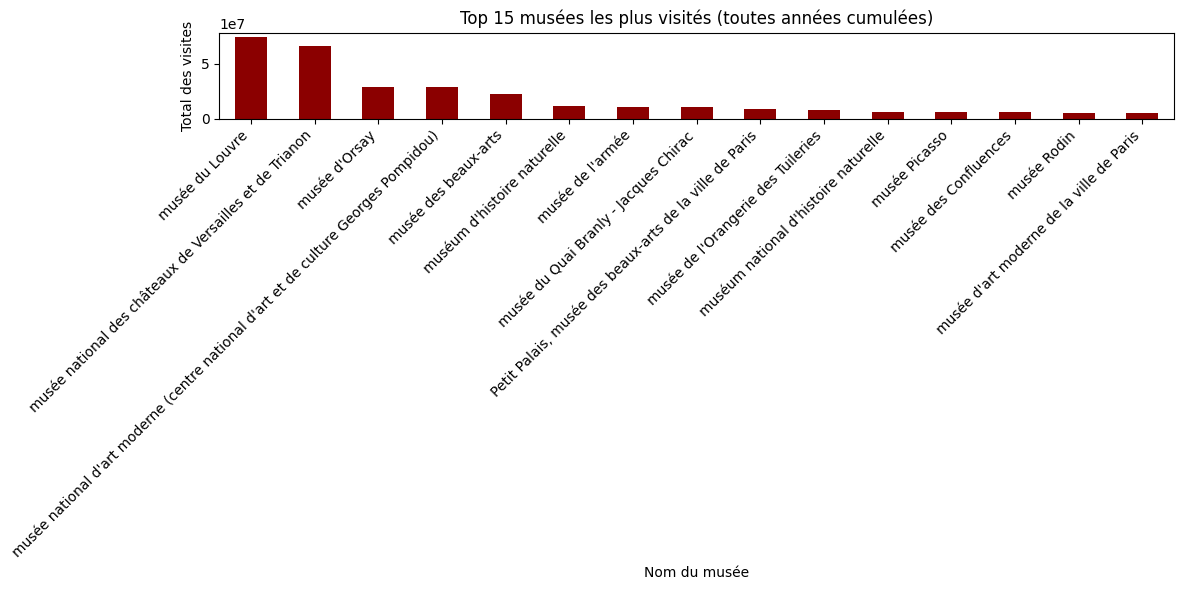

In [6]:
#top15 des musées les plus freq
top_musees = (
    df.groupby("nom_officiel")["total"]
      .sum()
      .sort_values(ascending=False)
      .head(15)
)

plt.figure(figsize=(12,6))
top_musees.plot(kind="bar", color="darkred")
plt.title("Top 15 musées les plus visités (toutes années cumulées)")
plt.ylabel("Total des visites")
plt.xlabel("Nom du musée")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#voir hors idf


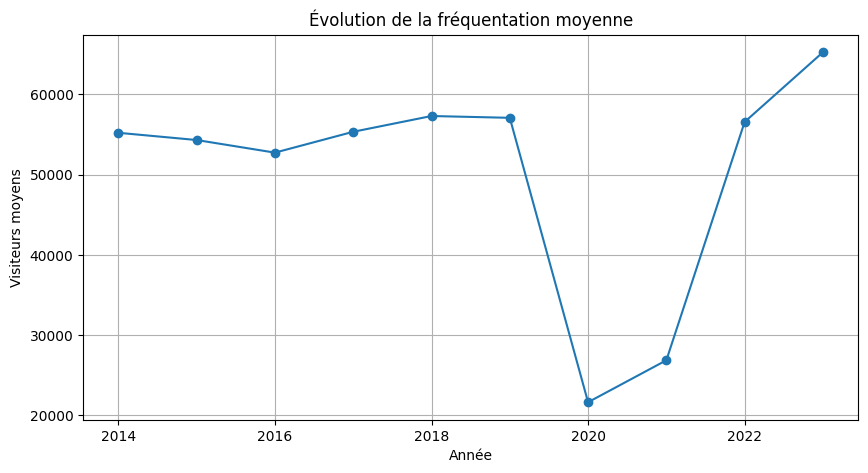

In [7]:
#Evolution temporelle (attention chiffres en milliers)
df_year = df.groupby("annee")["total"].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_year["annee"], df_year["total"], marker="o")
plt.title("Évolution de la fréquentation moyenne")
plt.xlabel("Année")
plt.ylabel("Visiteurs moyens")
plt.grid(True)
plt.show()


## Analyse régionale

In [8]:
#DF GEO 
# On enlève les lignes sans coordonnées
df_geo = df.dropna(subset=["latitude", "longitude"]).copy()

# Création de la colonne geometry à partir de lon/lat
gdf_points = gpd.GeoDataFrame(
    df_geo,
    geometry=gpd.points_from_xy(df_geo["longitude"], df_geo["latitude"]),
    crs="EPSG:4326"  # WGS84, le classique lat/lon
)

gdf_points.head()


,id_patrimostat,id_museofile,dateappellation,ferme,anneefermeture,ville,codeInseeCommune,annee,payant,gratuit,...,total_frequentation,age_musee,age_musee_missing,total_t_1,croissance_total,total_t_1_missing,croissance_missing,has_excel,est_idf,geometry
0,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2014,1865.0,2685.0,...,4550.0,54.0,0,NaN,NaN,1,1,1,0,POINT (7.4511 48.41017)
1,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2015,1874.0,1934.0,...,3808.0,55.0,0,4550.0,-0.163077,0,0,1,0,POINT (7.4511 48.41017)
2,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2016,1705.0,1409.0,...,3114.0,56.0,0,3808.0,-0.182248,0,0,1,0,POINT (7.4511 48.41017)
3,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2017,1163.0,1281.0,...,2444.0,57.0,0,3114.0,-0.215157,0,0,1,0,POINT (7.4511 48.41017)
4,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2018,1249.0,2341.0,...,3590.0,58.0,0,2444.0,0.468903,0,0,1,0,POINT (7.4511 48.41017)


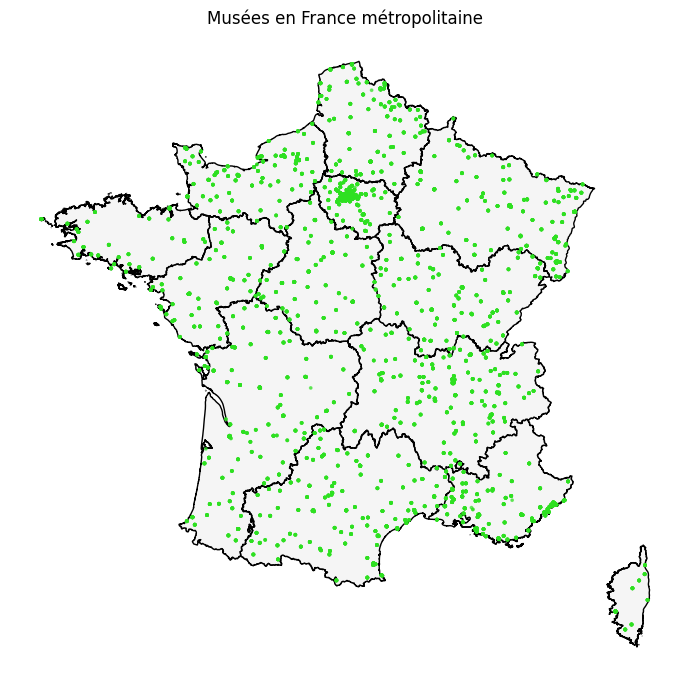

In [ ]:
from cartiflette import carti_download
#carte des musées en FR métro
#Filtre France métropolitaine sur les points
mask_metropole = (
    gdf_points.geometry.y.between(41, 52) &   # latitude
    gdf_points.geometry.x.between(-6, 10)     # longitude
)
gdf_points_metropole = gdf_points[mask_metropole].copy()

#Télécharger la carte des régions
france = carti_download(
    values=["France"],
    crs=4326,
    borders="REGION",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022
)

# garder seulement la métropole
france = france.loc[france["INSEE_REG"] > 10]

#Tracer
fig, ax = plt.subplots(figsize=(7, 9))

# fond de carte
france.plot(ax=ax, color="whitesmoke", edgecolor="black")

# taille des points bornée (évite la grosse tache)
ms = np.clip(gdf_points_metropole["total"] / 100000, 3, 20)

gdf_points_metropole.plot(
    ax=ax,
    markersize=ms,
    color="#2ee021",
    alpha=0.6
)

ax.set_title("Musées en France métropolitaine")
ax.set_axis_off()
plt.tight_layout()
plt.show()

#voir ce qu'on peut faire avec données insee (touristes, densité)

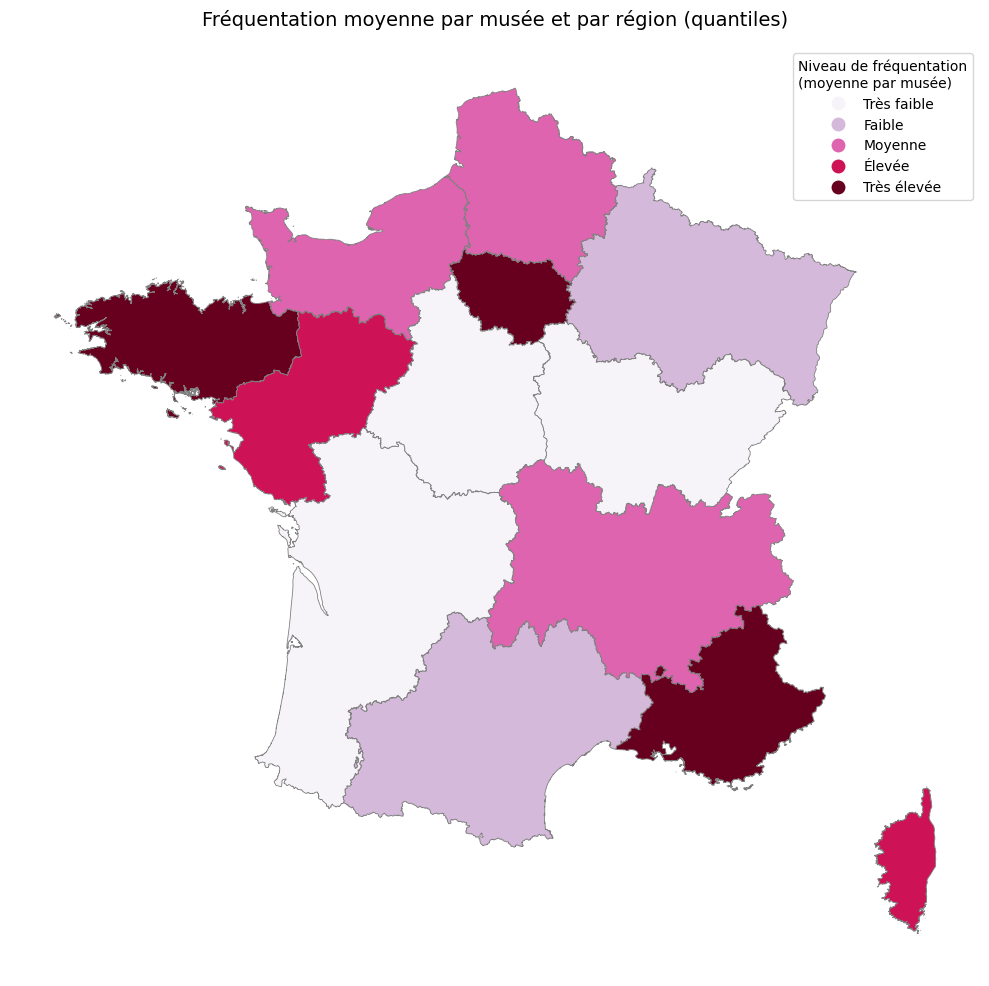

In [38]:
#CARTE FREQ MOY
import mapclassify


#Fréquentation moyenne par musée dans chaque région
df_region = (
    df.groupby("region")
      .agg(
          visites_totales=("total", "sum"),
          nb_musees=("id_museofile", "nunique")
      )
)

df_region["freq_par_musee"] = df_region["visites_totales"] / df_region["nb_musees"]
df_region = df_region.reset_index()

#Fonction de normalisation des noms de régions
def normalize_name(s):
    """Met les noms de région en minuscule, enlève les espaces et harmonise les tirets."""
    if pd.isna(s):
        return np.nan
    s = str(s).lower()
    s = s.replace("–", "-").replace("—", "-")  # différents tirets → '-'
    s = s.replace("  ", " ")
    return s.strip()

#réer region_clean côté données et côté carte
df_region["region_clean"] = df_region["region"].apply(normalize_name)
france["region_clean"] = france["LIBELLE_REGION"].apply(normalize_name)

#Corrections manuelles sur quelques régions
mapping = {
    "pays-de-la-loire": "pays de la loire",
    "provence-alpes-côte-d'azur": "provence-alpes-côte d'azur",
    "territoires et départements d'outre-mer": np.nan,  # on ignore, pas dans la carte
}

df_region["region_clean"] = df_region["region_clean"].replace(mapping)

#On enlève les lignes sans région métropolitaine
df_region = df_region.dropna(subset=["region_clean"])

#Jointure
france_reg = france.merge(
    df_region[["region_clean", "freq_par_musee"]],
    on="region_clean",
    how="left"
)

#On garde uniquement les régions avec données (métropole)
france_reg_clean = france_reg[france_reg["freq_par_musee"].notna()].copy()

#Classification en quantiles
scheme = mapclassify.Quantiles(france_reg_clean["freq_par_musee"], k=5)

#Tracé de la choroplèthe
fig, ax = plt.subplots(figsize=(10, 10))

france_reg_clean.plot(
    column="freq_par_musee",
    cmap="PuRd",
    legend=True,
    edgecolor="grey",
    linewidth=0.6,
    scheme="Quantiles",   
    k=5,                  
    ax=ax
)

#Légende qualitative
labels = ["Très faible", "Faible", "Moyenne", "Élevée", "Très élevée"]

leg = ax.get_legend()
leg.set_title("Niveau de fréquentation\n(moyenne par musée)")

for lbl, txt in zip(labels, leg.texts):
    txt.set_text(lbl)

ax.set_title("Fréquentation moyenne par musée et par région (quantiles)", 
             fontsize=14, pad=15)
ax.set_axis_off()

plt.tight_layout()
plt.show()


## Analyse des publics

In [11]:
#catégories 
df["categorie"].value_counts(dropna=False)

#c chiant y a bcp de NaN et plein de catégories diff dc faut taffer dessus

categorie
NaN                                                          6590
musée en milieu rural                                        1319
Musée de site                                                 511
musée de site ; musée en milieu rural                         364
musée en zone rurale                                          320
                                                             ... 
Ecomusée ; Musée de plein air ; Musée de site                   7
musée de site ; musée en zone rurale ; site archéologique       6
Musée d'Histoire                                                6
Maison musée                                                    5
Maison  musée. Maison des Illustres.                            4
Name: count, Length: 88, dtype: int64

In [12]:
#Parts gratuit etc 
print(df[["part_gratuit","part_scolaires","part_individuels"]].describe())



       part_gratuit  part_scolaires  part_individuels
count   9835.000000     8533.000000       8475.000000
mean       0.546975        0.150406          0.746921
std        0.312579        0.152455          0.227458
min        0.000000        0.000000          0.000000
25%        0.290885        0.038792          0.651140
50%        0.533213        0.109170          0.797020
75%        0.813839        0.215014          0.895077
max        1.000000        1.896552          6.773839


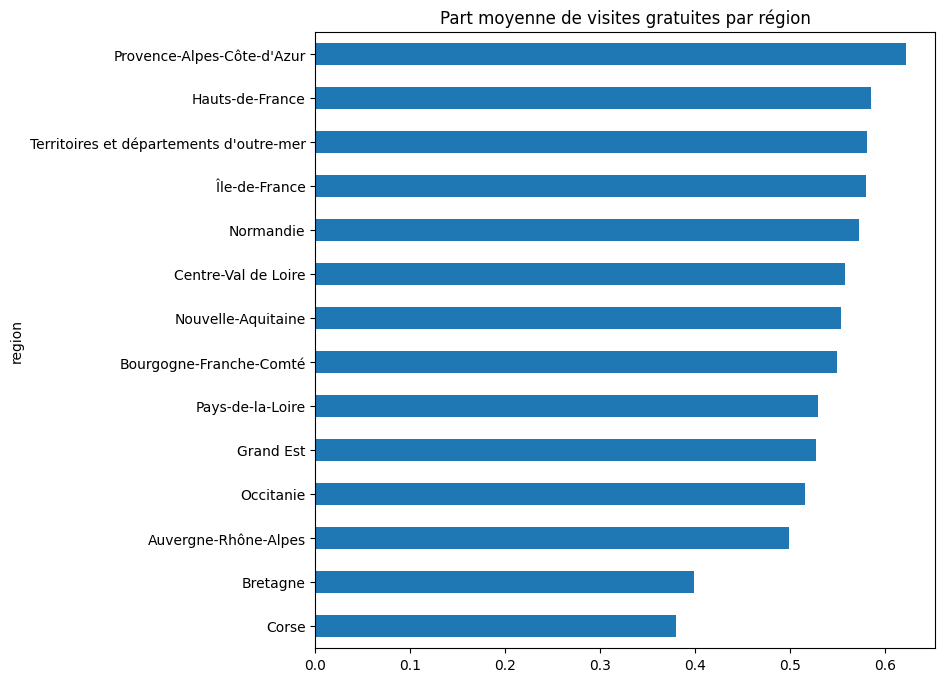

In [13]:
#Par région
df.groupby("region")["part_gratuit"].mean().sort_values().plot(kind="barh", figsize=(8,8))
plt.title("Part moyenne de visites gratuites par région")
plt.show()


## Analyse de l'âge des musées (?)

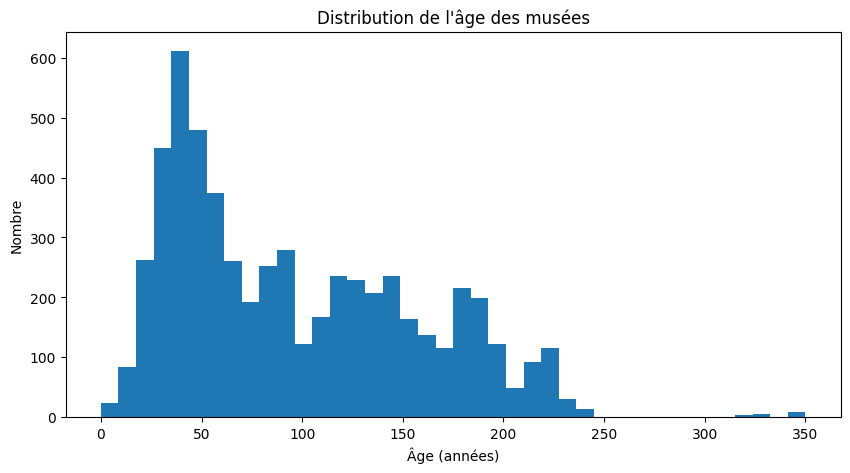

In [14]:
plt.figure(figsize=(10,5))
plt.hist(df["age_musee"].dropna(), bins=40)
plt.title("Distribution de l'âge des musées")
plt.xlabel("Âge (années)")
plt.ylabel("Nombre")
plt.show()


# Régressions 

In [15]:
df_reg = df.copy()

# 1. variable cible
df_reg["y"] = np.log1p(df_reg["total"]) #on prend log(1+total) pr pas avoir log(0)

# 2. log du lag
df_reg["lag_y"] = np.log1p(df_reg["total_t_1"])

# 3. variables explicatives retenues
vars_kept = [
    "age_musee", "part_gratuit", "part_scolaires",
    "part_individuels", "lag_y", "est_idf"
]

# 4. retirer les NA
df_reg = df_reg.dropna(subset=vars_kept + ["y"])

# 5. prêt pour régression simple ou multiple
df_reg.head()



,id_patrimostat,id_museofile,dateappellation,ferme,anneefermeture,ville,codeInseeCommune,annee,payant,gratuit,...,age_musee,age_musee_missing,total_t_1,croissance_total,total_t_1_missing,croissance_missing,has_excel,est_idf,y,lag_y
1,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2015,1874.0,1934.0,...,55.0,0,4550.0,-0.163077,0,0,1,0,8.245122,8.423102
3,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2017,1163.0,1281.0,...,57.0,0,3114.0,-0.215157,0,0,1,0,7.801800,8.043984
4,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2018,1249.0,2341.0,...,58.0,0,2444.0,0.468903,0,0,1,0,8.186186,7.801800
5,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2019,1104.0,2100.0,...,59.0,0,3590.0,-0.107521,0,0,1,0,8.072467,8.186186
6,6702101,M0001,01/02/2003,NON,NaN,BARR,67021,2020,783.0,205.0,...,60.0,0,3204.0,-0.691635,0,0,1,0,6.896694,8.072467


## selon âge du musée

In [16]:
import statsmodels.api as sm

X = sm.add_constant(df_reg["age_musee"])
y = df_reg["y"]

model_age = sm.OLS(y, X).fit()
print(model_age.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     183.1
Date:                Mon, 15 Dec 2025   Prob (F-statistic):           7.51e-41
Time:                        12:55:20   Log-Likelihood:                -7461.6
No. Observations:                4087   AIC:                         1.493e+04
Df Residuals:                    4085   BIC:                         1.494e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8755      0.044    200.607      0.0

Le coefficient associé est 0.0052 : cela signifie qu’un an d’ancienneté supplémentaire accroît la fréquentation d’environ 0,52 %.
Par exemple, un musée 20 ans plus ancien aura une fréquentation environ 10 % supérieure, toutes choses égales par ailleurs.
Le R² de 0.043 indique que l’âge n’explique qu’une faible part des différences de fréquentation : d’autres facteurs jouent un rôle beaucoup plus important (localisation, type de musée, taille, gratuité, etc.).

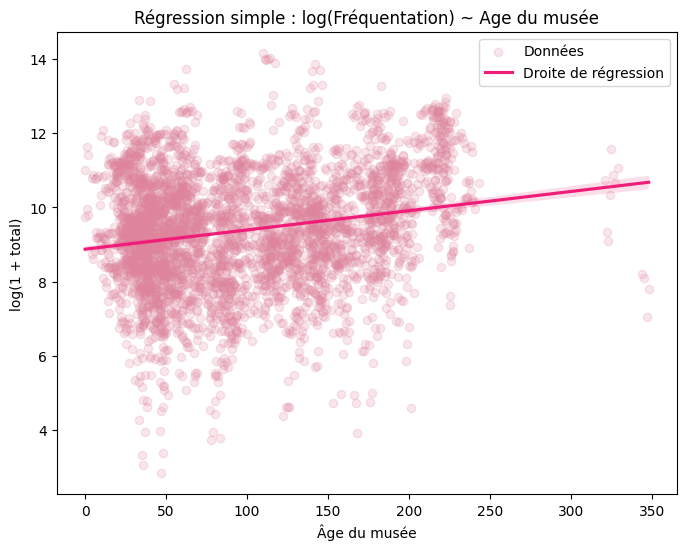

In [41]:
import seaborn as sns

# Scatter des points
plt.figure(figsize=(8,6))
plt.scatter(df_reg["age_musee"], df_reg["y"], alpha=0.2, label="Données", color="#de849c")

# Prédictions de la droite
X_plot = sm.add_constant(df_reg["age_musee"])
df_reg["y_pred"] = model_age.predict(X_plot)

# Tracer la droite de régression (en noir)
sns.regplot(
    x=df_reg["age_musee"],
    y=df_reg["y"],
    scatter=False,
    color="#f01d78",
    label="Droite de régression"
)

plt.xlabel("Âge du musée")
plt.ylabel("log(1 + total)")
plt.title("Régression simple : log(Fréquentation) ~ Age du musée")
plt.legend()
plt.show()


## Si musée est en IdF

In [18]:
X = sm.add_constant(df_reg["est_idf"])
model_idf = sm.OLS(df_reg["y"], X).fit()
model_idf.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     51.87
Date:                Mon, 15 Dec 2025   Prob (F-statistic):           7.02e-13
Time:                        12:55:22   Log-Likelihood:                -7525.5
No. Observations:                4087   AIC:                         1.505e+04
Df Residuals:                    4085   BIC:                         1.507e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3181      0.026    365.312      0.000       9.268       9.368
est_idf        0.5211      0.072      7.202      0.000       0.379       0.663
==============================================================================
Omnibus:                       77.511   Durbin-Watson:                   0.434
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.173
Skew:                          -0.293   Prob(JB):                     7.14e-20
Kurtosis:                       3.418   Cond. No.                         3.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

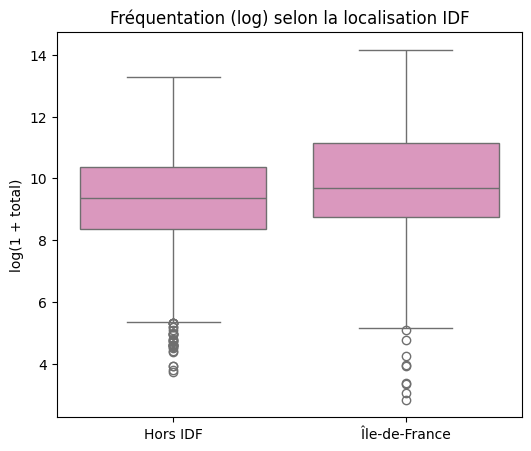

In [45]:
plt.figure(figsize=(6,5))
sns.boxplot(x=df_reg["est_idf"], y=df_reg["y"],color="#e58dc0")
plt.xticks([0,1], ["Hors IDF", "Île-de-France"])
plt.title("Fréquentation (log) selon la localisation IDF")
plt.xlabel("")
plt.ylabel("log(1 + total)")
plt.show()



Le boxplot met clairement en évidence un décalage vers le haut de la distribution de la fréquentation (en log) pour les musées situés en Île-de-France.

Alors que les deux distributions sont très dispersées, ce qui reflète l’hétérogénéité des musées tant en IDF qu’en province, la médiane francilienne est plus élevée, et le troisième quartile atteint des niveaux plus importants.

Ce résultat est cohérent avec la régression simple y ~ est_idf, qui estime un coefficient positif et significatif (≈ 0.52), indiquant qu’un musée IDF présente en moyenne une fréquentation supérieure d’environ +68 % à un musée similaire hors IDF.

Cependant, la dispersion interne de chaque groupe explique que le R² ne soit que de 1,3 % : si l’IDF est un facteur structurel important, il est loin d’être suffisant à lui seul pour expliquer les différences de fréquentation. D’autres variables (taille, catégorie, attractivité touristique, notoriété) joueront un rôle majeur dans les modèles multiples.

## part scolaire


In [20]:
X = sm.add_constant(df_reg["part_scolaires"])
model_sco = sm.OLS(df_reg["y"], X).fit()
model_sco.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     45.70
Date:                Mon, 15 Dec 2025   Prob (F-statistic):           1.58e-11
Time:                        12:55:22   Log-Likelihood:                -7528.5
No. Observations:                4087   AIC:                         1.506e+04
Df Residuals:                    4085   BIC:                         1.507e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.5455      0.034    281.488      0.000       9.479       9.612
part_scolaires    -1.0648      0.158     -6.760      0.000      -1.374      -0.756
==============================================================================
Omnibus:                       93.103   Durbin-Watson:                   0.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.959
Skew:                          -0.319   Prob(JB):                     2.19e-24
Kurtosis:                       3.484   Cond. No.                         6.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

La proportion de visites scolaires est fortement et significativement associée à une fréquentation plus faible : le coefficient estimé (≈ –1.06) indique qu’une hausse de 10 points de pourcentage de la part de scolaires réduit d’environ 10 % la fréquentation totale attendue.

Ce résultat ne doit pas être interprété comme un effet causal de la présence de scolaires, mais comme un marqueur structurel du type de musée. Les musées accueillant majoritairement des scolaires sont souvent de petite taille, centrés sur l’éducation ou l’histoire locale, et naturellement moins touristiques.

Comme l’indique le R² limité (1,1 %), cette variable ne suffit pas à expliquer les différences de fréquentation, mais elle capture un aspect important de la typologie des musées.

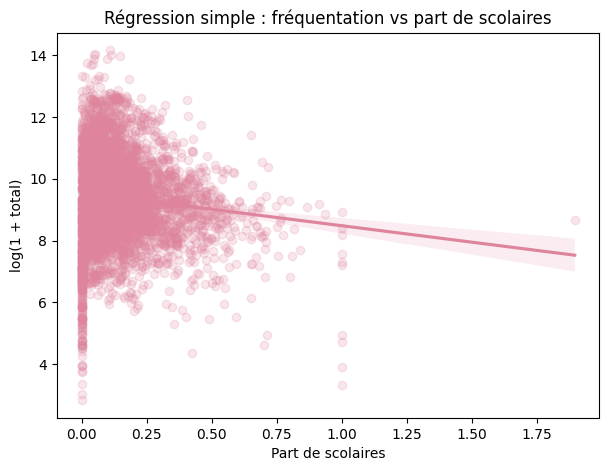

In [46]:
plt.figure(figsize=(7,5))
sns.regplot(x=df_reg["part_scolaires"], y=df_reg["y"], scatter_kws={'alpha':0.2},color="#de849c")
plt.xlabel("Part de scolaires")
plt.ylabel("log(1 + total)")
plt.title("Régression simple : fréquentation vs part de scolaires")
plt.show()


## total_n_1

In [22]:
X = sm.add_constant(df_reg["lag_y"])
model_lag = sm.OLS(df_reg["y"], X).fit()
model_lag.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     5275.
Date:                Mon, 15 Dec 2025   Prob (F-statistic):               0.00
Time:                        12:55:22   Log-Likelihood:                -5857.0
No. Observations:                4087   AIC:                         1.172e+04
Df Residuals:                    4085   BIC:                         1.173e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9985      0.076     52.739      0.000       3.850       4.147
lag_y          0.5835      0.008     72.628      0.000       0.568       0.599
==============================================================================
Omnibus:                     1900.751   Durbin-Watson:                   1.439
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27120.350
Skew:                           1.843   Prob(JB):                         0.00
Kurtosis:                      15.070   Cond. No.                         45.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

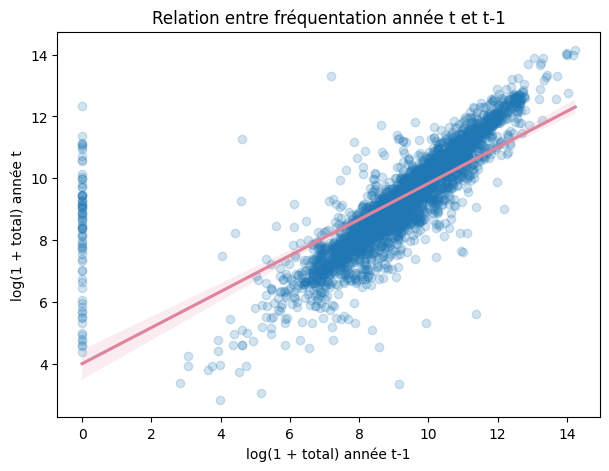

In [49]:
plt.figure(figsize=(7,5))
sns.regplot(
    x=df_reg["lag_y"],
    y=df_reg["y"],
    scatter_kws={'alpha':0.2},
    line_kws={'color':"#de849c"}
)
plt.xlabel("log(1 + total) année t-1")
plt.ylabel("log(1 + total) année t")
plt.title("Relation entre fréquentation année t et t-1")
plt.show()


La régression simple de la fréquentation (en log) sur sa valeur retardée montre que la fréquentation passée est de loin le meilleur prédicteur de la fréquentation actuelle. Le coefficient associé à lag_y est élevé (0.58) et fortement significatif (t = 72.6, p < 0.001), ce qui indique une inertie très forte dans les niveaux d’affluence : les musées conservent une attractivité relativement stable d’une année sur l’autre.

Le R² atteint 0.564, un niveau exceptionnel pour un modèle univarié, très supérieur à celui obtenu avec des variables structurelles (âge, part scolaire). Cela signifie que plus de la moitié de la variance observée dans les fréquentations annuelles s’explique uniquement par la fréquentation de l’année précédente.

Cette dynamique inertielle est attendue dans le secteur muséal : à caractéristiques constantes, les musées attirent des volumes de visiteurs relativement réguliers, modulés ensuite par des variations liées aux expositions temporaires, aux rénovations, aux événements touristiques ou économiques.

## régions

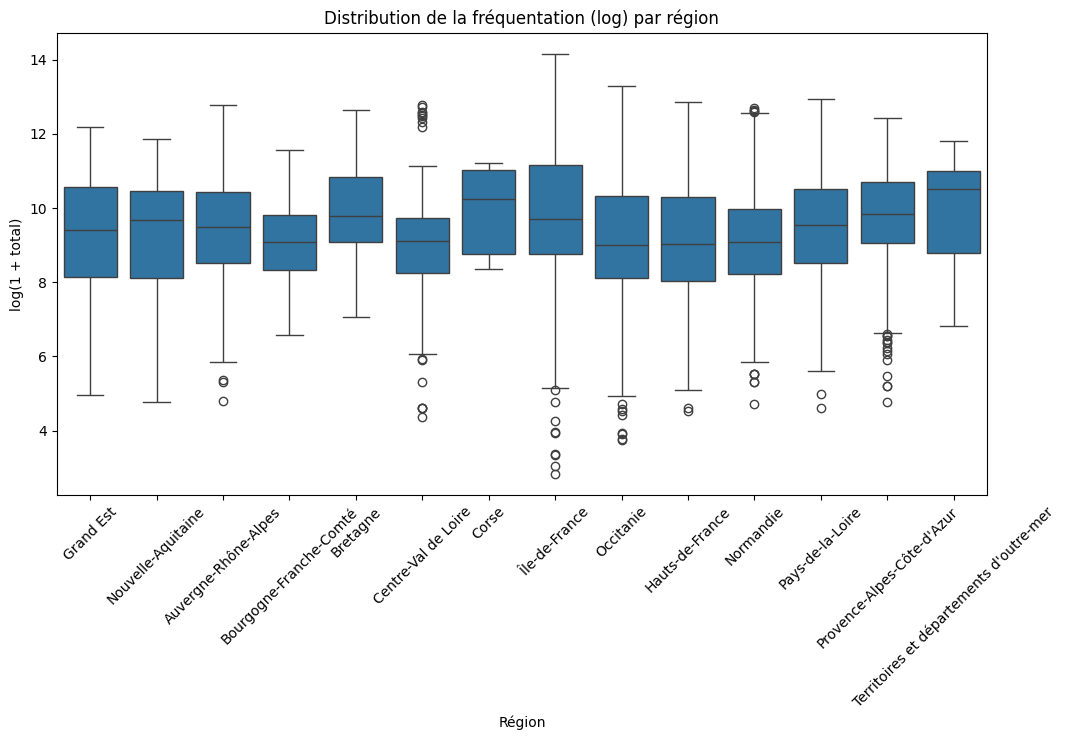

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_reg, x="region", y="y")
plt.xticks(rotation=45)
plt.xlabel("Région")
plt.ylabel("log(1 + total)")
plt.title("Distribution de la fréquentation (log) par région")
plt.show()


La fréquentation des musées varie fortement selon les régions. L’Île-de-France se distingue nettement par une médiane et un maximum beaucoup plus élevés, reflétant la présence de musées nationaux majeurs. Les régions touristiques comme Provence-Alpes-Côte-d’Azur, Auvergne–Rhône-Alpes ou Bretagne présentent également des niveaux élevés. À l’inverse, des régions comme Centre-Val de Loire, Grand Est ou Bourgogne-Franche-Comté affichent des distributions plus modestes. La dispersion importante dans chaque région témoigne néanmoins d’une grande hétérogénéité interne entre musées.

In [25]:
import statsmodels.formula.api as smf

anova_model = smf.ols("y ~ C(region)", data=df_reg).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(region),393.238440,13.0,13.334341,1.856917e-29
Residual,9239.648878,4073.0,NaN,NaN


L’analyse de variance (ANOVA) appliquée au modèle y ~ C(region) révèle l’existence de différences significatives de fréquentation entre les régions françaises. Le test F associé au facteur « région » est élevé (F ≈ 13.3) et la p-value extrêmement faible (p < 10⁻²⁸), ce qui conduit à rejeter l’hypothèse d’égalité des fréquentations moyennes entre régions.

Ces résultats confirment ce qui apparaît déjà dans les boxplots régionaux : la fréquentation muséale n’est pas uniformément répartie sur le territoire, et certaines régions disposent d’un niveau structurellement plus élevé que d’autres. L’effet régional est donc statistiquement significatif et justifie l’estimation d’un modèle catégoriel permettant d’identifier précisément les régions associées à une fréquentation plus ou moins élevée.

In [26]:

# Modèle catégoriel
model_region = smf.ols("y ~ C(region)", data=df_reg).fit()

model_region.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     13.33
Date:                Mon, 15 Dec 2025   Prob (F-statistic):           1.86e-29
Time:                        12:55:23   Log-Likelihood:                -7466.1
No. Observations:                4087   AIC:                         1.496e+04
Df Residuals:                    4073   BIC:                         1.505e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                                9.4890      0.094    101.196      0.000       9.305       9.673
C(region)[T.Bourgogne-Franche-Comté]                    -0.4005      0.133     -3.008      0.003      -0.662      -0.140
C(region)[T.Bretagne]                                    0.4184      0.151      2.771      0.006       0.122       0.714
C(region)[T.Centre-Val de Loire]                        -0.4773      0.141     -3.396      0.001      -0.753      -0.202
C(region)[T.Corse]                                       0.4954      0.321      1.541      0.123      -0.135       1.126
C(region)[T.Grand Est]                                  -0.2281      0.120     -1.901      0.057      -0.463       0.007
C(region)[T.Hauts-de-France]                            -0.3604      0.125     -2.873      0.004      -0.606      -0.114
C(region)[T.Normandie]                                  -0.4051      0.121     -3.336      0.001      -0.643      -0.167
C(region)[T.Nouvelle-Aquitaine]                         -0.2481      0.131     -1.887      0.059      -0.506       0.010
C(region)[T.Occitanie]                                  -0.3723      0.114     -3.260      0.001      -0.596      -0.148
C(region)[T.Pays-de-la-Loire]                            0.0090      0.134      0.067      0.946      -0.253       0.271
C(region)[T.Provence-Alpes-Côte-d'Azur]                  0.2509      0.116      2.159      0.031       0.023       0.479
C(region)[T.Territoires et départements d'outre-mer]     0.5202      0.291      1.790      0.073      -0.049       1.090
C(region)[T.Île-de-France]                               0.3501      0.115      3.040      0.002       0.124       0.576
==============================================================================
Omnibus:                       78.062   Durbin-Watson:                   0.447
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.807
Skew:                          -0.267   Prob(JB):                     1.57e-21
Kurtosis:                       3.526   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# 1. On récupère uniquement les coefficients régionaux
coefs = model_region.params.filter(like="C(region)").sort_values()

# 2. On met l'index dans une colonne
coef_df = coefs.rename_axis("raw").reset_index(name="effet_log")

# 3. On extrait le nom de la région avec une regex bien formée
coef_df["region"] = coef_df["raw"].str.extract(r"C\(region\)\[T\.(.*)\]")

# 4. On garde seulement les colonnes utiles
coef_df = coef_df[["region", "effet_log"]]

coef_df



,region,effet_log
0,Centre-Val de Loire,-0.477253
1,Normandie,-0.405113
2,Bourgogne-Franche-Comté,-0.400515
3,Occitanie,-0.372282
4,Hauts-de-France,-0.360368
5,Nouvelle-Aquitaine,-0.248096
6,Grand Est,-0.228099
7,Pays-de-la-Loire,0.008989
8,Provence-Alpes-Côte-d'Azur,0.250929
9,Île-de-France,0.350092


In [28]:
# Ajout colonne effet en pourcentage
coef_df["effet_pct"] = (np.exp(coef_df["effet_log"]) - 1) * 100

coef_df_sorted = coef_df.sort_values("effet_pct", ascending=False)
coef_df_sorted


,region,effet_log,effet_pct
12,Territoires et départements d'outre-mer,0.520192,68.235121
11,Corse,0.495449,64.123479
10,Bretagne,0.418399,51.952718
9,Île-de-France,0.350092,41.919854
8,Provence-Alpes-Côte-d'Azur,0.250929,28.521839
7,Pays-de-la-Loire,0.008989,0.902958
6,Grand Est,-0.228099,-20.395483
5,Nouvelle-Aquitaine,-0.248096,-21.971503
4,Hauts-de-France,-0.360368,-30.258021
3,Occitanie,-0.372282,-31.084006


# Modélisation 

## OLS : à faire

## Modélisation prédictive : LASSO

Objectif : prédire la fréquentation d’un musée (variable cible en log) à partir de variables
structurelles (âge, localisation), de composition du public (parts) et de variables temporelles (lag).

Le LASSO est utilisé pour :
- standardiser et sélectionner automatiquement les variables,
- limiter le sur-ajustement,
- comparer la performance sur un jeu de test.


In [29]:
import numpy as np
import pandas as pd

from pathlib import Path

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Lecture des données (base construite dans le notebook construction)
df = pd.read_csv("../output/df_modele_musees.csv")

df.shape, df.head(3)


((11250, 36),
   id_patrimostat id_museofile dateappellation ferme anneefermeture ville  \
 0        6702101        M0001      01/02/2003   NON            NaN  BARR   
 1        6702101        M0001      01/02/2003   NON            NaN  BARR   
 2        6702101        M0001      01/02/2003   NON            NaN  BARR   
 
   codeInseeCommune  annee  payant  gratuit  ...  longitude  \
 0            67021   2014  1865.0   2685.0  ...   7.451102   
 1            67021   2015  1874.0   1934.0  ...   7.451102   
 2            67021   2016  1705.0   1409.0  ...   7.451102   
 
    total_frequentation  age_musee  age_musee_missing  total_t_1  \
 0               4550.0       54.0                  0        NaN   
 1               3808.0       55.0                  0     4550.0   
 2               3114.0       56.0                  0     3808.0   
 
    croissance_total  total_t_1_missing  croissance_missing  has_excel est_idf  
 0               NaN                  1                   1        

## 1) Variable cible et variables explicatives

- Cible : `y = log(1 + total)` (stabilise la variance et réduit l'effet des très gros musées)
- Variables candidates :
  - inertie : `total_t_1` (lag)
  - structure : `age_musee`, `est_idf`
  - composition du public : `part_gratuit`, `part_scolaires`, `part_individuels`
  - effets territoriaux : dummies de `region`

Remarque : le LASSO nécessite une standardisation des variables numériques.


In [30]:
# cible en log
df["y"] = np.log1p(df["total"])

# variables de base (numériques / binaires)
base_features = [
    "total_t_1",
    "age_musee",
    "est_idf",
    "part_gratuit",
    "part_scolaires",
    "part_individuels",
]

# On garde seulement les colonnes utiles
cols_needed = ["y", "region"] + base_features
df_lasso = df[cols_needed].copy()

# Important : on garde les NA (LASSO ne les accepte pas), donc on filtre ensuite
df_lasso.isna().mean().sort_values(ascending=False).head(10)


age_musee           0.489600
part_individuels    0.246667
part_scolaires      0.241511
part_gratuit        0.125778
total_t_1           0.110756
region              0.010667
y                   0.000178
est_idf             0.000000
dtype: float64

## 2) Valeurs manquantes

Le LASSO ne gère pas les valeurs manquantes. Ainsi

- on conserve uniquement les lignes complètes sur les variables utilisées (approche "complete case"),
ce qui est acceptable pour un premier modèle de référence.
- on pourra ensuite tester une imputation (médiane / indicateurs de missingness) si nécessaire.

In [31]:
# complete-case
df_lasso_cc = df_lasso.dropna().copy()
print("Taille avant :", df_lasso.shape)
print("Taille après complete-case :", df_lasso_cc.shape)

# Dummies de région (drop_first pour éviter redondance)
X = pd.get_dummies(df_lasso_cc[base_features + ["region"]], drop_first=True)
y = df_lasso_cc["y"]

X.shape, y.shape


Taille avant : (11250, 8)
Taille après complete-case : (4087, 8)


((4087, 19), (4087,))

Après suppression des observations comportant des valeurs manquantes sur les variables
retenues, l’échantillon utilisé pour le LASSO comprend 4 087 observations. Cette réduction
est principalement due aux variables dynamiques et structurelles (âge du musée, composition
du public, terme retardé), dont la disponibilité est hétérogène selon les musées et les années.
La taille finale reste néanmoins suffisante pour une modélisation prédictive robuste.

## 3) Découpage Train/Test

On évalue la performance prédictive sur un jeu de test (20%).


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lasso_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", LassoCV(cv=5, random_state=42, alphas=100, max_iter=20000))
])

lasso_pipe.fit(X_train, y_train)

alpha_opt = lasso_pipe.named_steps["lasso"].alpha_
alpha_opt



np.float64(0.0008456565526732593)

Le paramètre de régularisation α sélectionné par validation croisée est faible (α ≈ 8.5×10⁻⁴), ce qui indique qu’une pénalisation trop forte dégraderait la performance prédictive. Cela suggère que la fréquentation des musées dépend de plusieurs variables explicatives pertinentes, sans qu’une sélection très agressive soit nécessaire

## 4) Performance prédictive
On reporte plusieurs métriques sur le jeu de test :
- R² (qualité globale)
- RMSE (erreur quadratique moyenne)
- MAE (erreur absolue moyenne)


In [33]:
y_pred = lasso_pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Alpha optimal (LASSO-CV) : {alpha_opt:.6f}")
print(f"R² test  : {r2:.3f}")
print(f"RMSE test: {rmse:.3f}")
print(f"MAE test : {mae:.3f}")


Alpha optimal (LASSO-CV) : 0.000846
R² test  : 0.398
RMSE test: 1.163
MAE test : 0.918


Le paramètre de régularisation sélectionné par validation croisée est faible (α ≈ 0.00085), ce qui indique qu’une pénalisation excessive dégraderait la performance prédictive. Le modèle LASSO explique environ 40 % de la variance de la fréquentation sur l’échantillon test, ce qui constitue un bon niveau de performance pour des données de sciences sociales. Les erreurs de prédiction restent modérées (RMSE ≈ 0.16 en log), suggérant une capacité de généralisation satisfaisante.

## 5) Variables sélectionnées par le LASSO

Le LASSO met à zéro les coefficients des variables peu informatives. On affiche ici :
- les coefficients non nuls,
- les variables les plus importantes en valeur absolue.

NB : les coefficients sont sur l’échelle des données standardisées (après StandardScaler).


In [34]:
coef = pd.Series(
    lasso_pipe.named_steps["lasso"].coef_,
    index=X.columns
).sort_values()

coef_non_zero = coef[coef != 0]
print("Nombre de variables sélectionnées :", coef_non_zero.shape[0])
coef_non_zero


Nombre de variables sélectionnées : 18


part_gratuit                                     -0.261929
region_Occitanie                                 -0.172842
region_Normandie                                 -0.142008
region_Hauts-de-France                           -0.133004
region_Centre-Val de Loire                       -0.110866
region_Bourgogne-Franche-Comté                   -0.091776
region_Grand Est                                 -0.087763
region_Nouvelle-Aquitaine                        -0.054592
region_Île-de-France                             -0.046175
region_Pays-de-la-Loire                          -0.029974
region_Corse                                      0.012195
region_Bretagne                                   0.016496
part_scolaires                                    0.019553
region_Territoires et départements d'outre-mer    0.058572
region_Provence-Alpes-Côte-d'Azur                 0.067570
part_individuels                                  0.082090
age_musee                                         0.2959

Le modèle LASSO sélectionne 18 variables explicatives, ce qui confirme que la fréquentation des musées repose sur plusieurs facteurs complémentaires. La variable la plus déterminante est la fréquentation de l’année précédente, traduisant une forte inertie temporelle. L’âge du musée exerce également un effet positif significatif, suggérant un rôle de la notoriété et de l’ancrage historique.

La composition du public joue un rôle non négligeable : une part plus élevée de visiteurs individuels est associée à une fréquentation plus importante, tandis que la part de gratuité est corrélée négativement, probablement en raison de stratégies propres à certains établissements. Les effets régionaux persistent après contrôle, mais restent d’ampleur modérée par rapport à la dynamique temporelle, y compris pour l’Île-de-France.

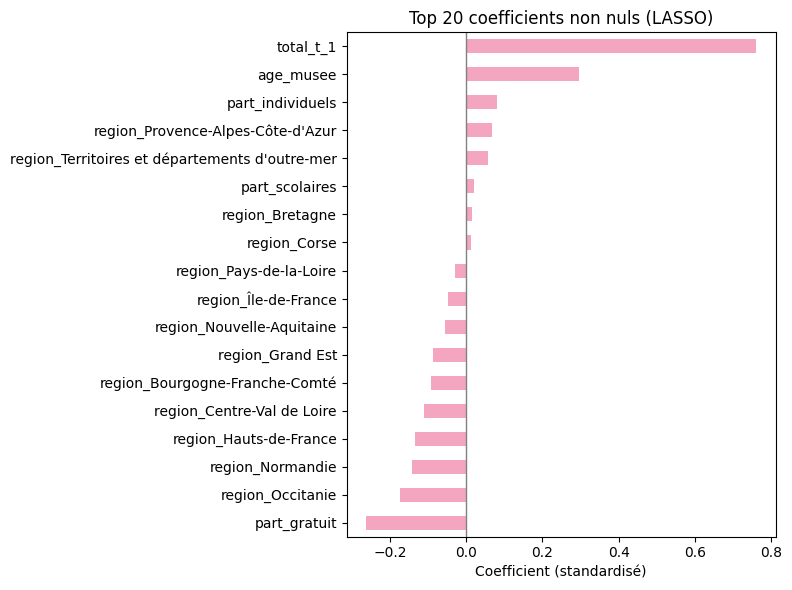

In [35]:
topk = 20
coef_plot = coef_non_zero.reindex(
    coef_non_zero.abs().sort_values(ascending=False).index
).head(topk)

plt.figure(figsize=(8, 6))
coef_plot.sort_values().plot(
    kind="barh",
    color ="#f4a6c1"   
)

plt.title(f"Top {topk} coefficients non nuls (LASSO)")
plt.xlabel("Coefficient (standardisé)")
plt.axvline(0, color="grey", linewidth=1)  
plt.tight_layout()
plt.show()




## 6) Diagnostic rapide

On visualise la qualité de prédiction via :
- nuage Observé vs Prédit,
- distribution des résidus sur test.


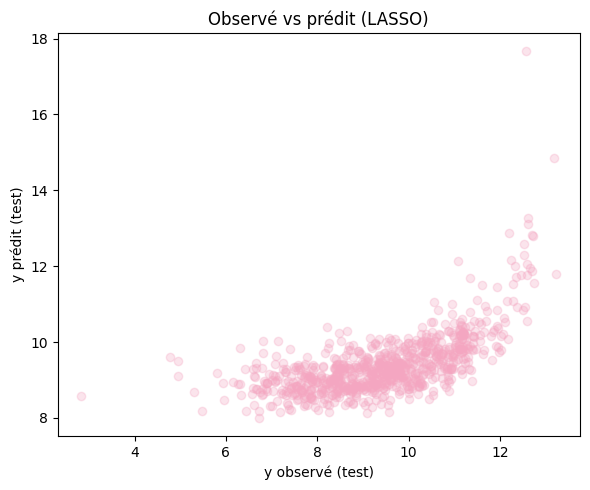

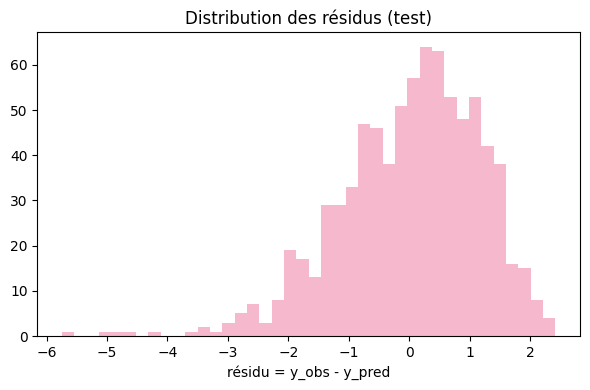

In [36]:
resid = y_test - y_pred

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.3, color="#f4a6c1")
plt.xlabel("y observé (test)")
plt.ylabel("y prédit (test)")
plt.title("Observé vs prédit (LASSO)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.hist(resid, bins=40, alpha=0.8, color="#f4a6c1")
plt.title("Distribution des résidus (test)")
plt.xlabel("résidu = y_obs - y_pred")
plt.tight_layout()
plt.show()


Le graphique observé vs prédit montre que les prédictions issues du modèle LASSO suivent globalement la diagonale, indiquant une bonne capacité à reproduire la structure moyenne de la fréquentation. La dispersion augmente pour les valeurs les plus élevées, ce qui suggère une sous-prédiction des musées les plus fréquentés, phénomène classique de régression vers la moyenne dans un cadre régularisé.

La distribution des résidus est centrée autour de zéro et relativement symétrique, ce qui indique l’absence de biais systématique. Quelques erreurs extrêmes subsistent, mais elles concernent un nombre limité d’observations. Dans l’ensemble, ces diagnostics confirment une capacité de généralisation satisfaisante du modèle LASSO.

Il convient toutefois de souligner que les résultats obtenus portent exclusivement sur des données annuelles agrégées. Le modèle permet ainsi de prédire des niveaux moyens de fréquentation à l’échelle d’une année, mais ne capte pas les variations infra-annuelles liées à des événements ponctuels, des expositions temporaires ou des chocs exceptionnels. Les performances prédictives doivent donc être interprétées comme une capacité à anticiper des tendances de moyen terme plutôt que des fluctuations de court terme.